In [2]:
%matplotlib inline

# General libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics



C:\Users\fbmardha\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\fbmardha\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [13]:
df = pd.read_csv('train.csv', parse_dates=[0])
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [14]:
print "Before cleanup dataframe shape:", df.shape

#Remove uneccessary columns; remove location data that is not accurate
df = df.drop(['Descript', 'Resolution'], axis=1)
df = df[df.X < -121]
df = df[df.Y< 80]

print "After cleanup dataframe shape:", df.shape

Before cleanup dataframe shape: (878049, 9)
After cleanup dataframe shape: (877982, 7)


In [15]:
# Add Hours, Days, Months, Years 
df['DOW'] = df.Dates.dt.weekday
df['DOM'] = df.Dates.dt.day
df['HOUR'] = df.Dates.dt.hour
df['MONTH'] = df.Dates.dt.month
df['YEAR'] = df.Dates.dt.year
df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,DOW,DOM,HOUR,MONTH,YEAR
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2,13,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2,13,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2,13,23,5,2015


PdDistrict  BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
YEAR                                                                         
2003           7948     6679       6893    10577      9294  4135      3850   
2004           8042     6794       6983    10282      9195  4044      3795   
2005           7540     6546       6616     9738      9337  3980      3480   
2006           7234     6734       6460     9659      9371  3865      3267   
2007           6870     6626       6233     9027      8080  3558      3249   
2008           7033     6681       5843     9963      7870  3611      3438   
2009           6734     6419       6015     9325      7900  3609      3431   
2010           6970     6008       6177     9040      7270  3350      3286   
2011           6891     6432       5948     9248      7346  3710      3411   
2012           7388     7152       6279     9558      8250  4528      4003   
2013           7345     7277       6595    10571      8858  4664

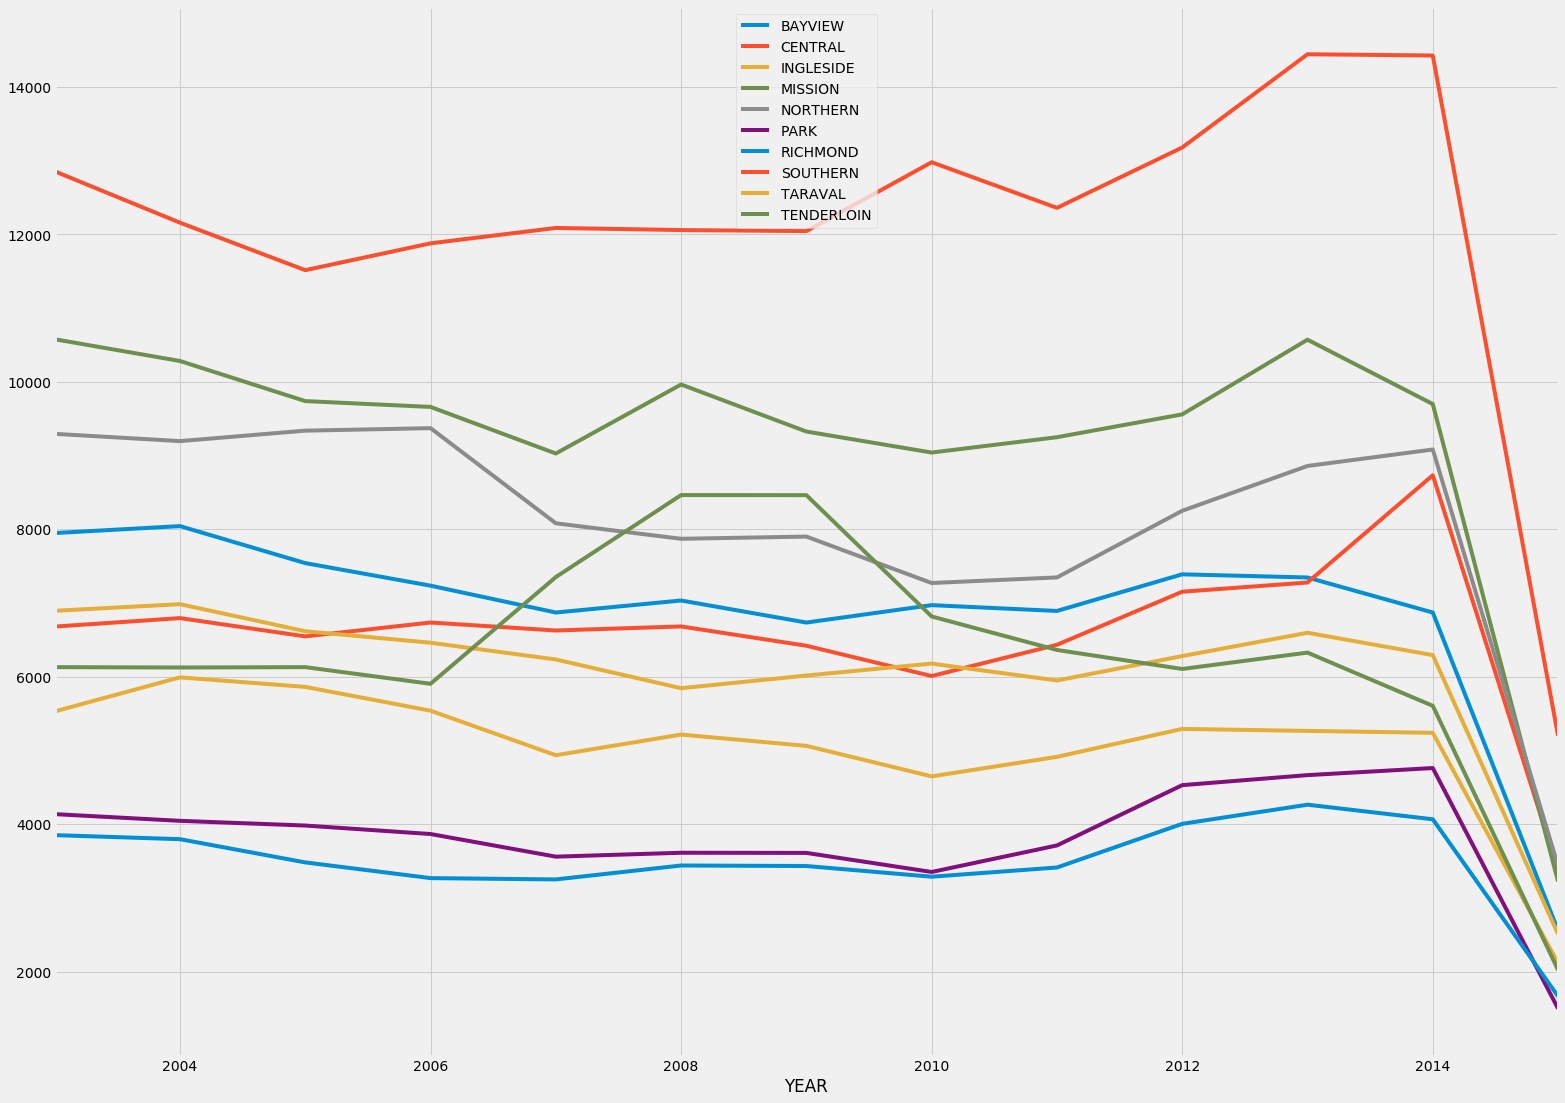

In [54]:
# Group by District and Category

grouped_dist = pd.DataFrame(df.groupby(['PdDistrict','YEAR']).count())
grouped_dist.reset_index(inplace=True)
grouped_dist_wide = grouped_dist.pivot(index='YEAR', columns='PdDistrict', values = 'Dates')
print grouped_dist_wide

plt.figure(); ax = grouped_dist_wide.plot(figsize=(24,18));
ax.legend(loc='upper center')
#plt.plot(grouped_dist_wide);
#plt.gca().legend();
#plt.show;

In [17]:
#Combining location and time:

df['Year_District'] = df.YEAR.astype(str).str.cat(df.PdDistrict.astype(str), sep=' ')
df['Month_District'] = df.MONTH.astype(str).str.cat(df.PdDistrict.astype(str), sep=' ')
df['Hour_District'] = df.HOUR.astype(str).str.cat(df.PdDistrict.astype(str), sep=' ')
df['DOM_District'] = df.DOM.astype(str).str.cat(df.PdDistrict.astype(str), sep=' ')
df['DOW_District'] = df.DOW.astype(str).str.cat(df.PdDistrict.astype(str), sep=' ')

df.head()

,Dates,Category,DayOfWeek,PdDistrict,Address,X,Y,DOW,DOM,HOUR,MONTH,YEAR,Year_District,Month_District,Hour_District,DOM_District,DOW_District
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,23,5,2015,2015 NORTHERN,5 NORTHERN,23 NORTHERN,13 NORTHERN,2 NORTHERN
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2,13,23,5,2015,2015 NORTHERN,5 NORTHERN,23 NORTHERN,13 NORTHERN,2 NORTHERN
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2,13,23,5,2015,2015 NORTHERN,5 NORTHERN,23 NORTHERN,13 NORTHERN,2 NORTHERN
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,2,13,23,5,2015,2015 NORTHERN,5 NORTHERN,23 NORTHERN,13 NORTHERN,2 NORTHERN
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,2,13,23,5,2015,2015 PARK,5 PARK,23 PARK,13 PARK,2 PARK


In [18]:
df_abbrev_train = df[['PdDistrict', 'DOM', 'DOW', 'MONTH', 'HOUR','YEAR']]

df_PdD = pd.get_dummies(df.PdDistrict)
df_DOM = pd.get_dummies(df.DOM, prefix = 'DofM')
df_DOW = pd.get_dummies(df.DOW, prefix = 'DofW')
df_MONTH = pd.get_dummies(df.MONTH, prefix = 'Month')
df_HOUR = pd.get_dummies(df.HOUR, prefix = 'Hour')
df_YEAR_DISTRICT = pd.get_dummies(df.Year_District, prefix = 'Year_District')
df_MONTH_DISTRICT = pd.get_dummies(df.Month_District, prefix = 'Month_District')
df_HOUR_DISTRICT = pd.get_dummies(df.Hour_District, prefix = 'Hour_District')
df_DOM_DISTRICT = pd.get_dummies(df.DOM_District, prefix = 'DOM_District')
df_DOW_DISTRICT = pd.get_dummies(df.DOW_District, prefix = 'DOW_District')

newdf = pd.concat([df_PdD, df_DOM], axis = 1)
newdf = pd.concat([newdf, df_DOW], axis = 1)
newdf = pd.concat([newdf, df_MONTH], axis = 1)
newdf = pd.concat([newdf, df_HOUR], axis = 1)
newdf.head()

#Split data
df_label = df.Category
X_train, X_dev, y_train, y_dev = train_test_split(newdf, df_label, test_size = 0.5, random_state= 42)

print X_train.shape
print X_train[0:5]

(438991, 84)
        BAYVIEW  CENTRAL  INGLESIDE  MISSION  NORTHERN  PARK  RICHMOND  \
207316        0        0          0        0         0     0         1   
565779        0        0          0        1         0     0         0   
152769        1        0          0        0         0     0         0   
466176        0        0          0        0         0     0         1   
633343        0        0          0        0         0     0         1   

        SOUTHERN  TARAVAL  TENDERLOIN   ...     Hour_14  Hour_15  Hour_16  \
207316         0        0           0   ...           0        0        0   
565779         0        0           0   ...           0        0        0   
152769         0        0           0   ...           0        0        0   
466176         0        0           0   ...           0        0        0   
633343         0        0           0   ...           0        0        0   

        Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  
207316 

In [32]:
#Multinomial Bayes to predict category based on original district and time data

nb = MultinomialNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_dev)
print (metrics.classification_report(y_dev, predictions))
print (metrics.f1_score(y_dev, predictions, average='weighted'))


accuracy_scores = {}
accuracy_scores['MNB original data'] = metrics.f1_score(y_dev, predictions, average='weighted')

                             precision    recall  f1-score   support

                      ARSON       0.02      0.07      0.03       770
                    ASSAULT       0.15      0.00      0.01     38369
                 BAD CHECKS       0.00      0.00      0.00       195
                    BRIBERY       0.00      0.00      0.00       145
                   BURGLARY       0.09      0.02      0.03     18505
         DISORDERLY CONDUCT       0.12      0.06      0.08      2151
DRIVING UNDER THE INFLUENCE       0.02      0.11      0.04      1116
              DRUG/NARCOTIC       0.22      0.33      0.26     27226
                DRUNKENNESS       0.05      0.00      0.00      2126
               EMBEZZLEMENT       0.02      0.02      0.02       575
                  EXTORTION       0.00      0.00      0.00       139
            FAMILY OFFENSES       0.00      0.00      0.00       257
     FORGERY/COUNTERFEITING       0.08      0.03      0.05      5253
                      FRAUD      

In [33]:
#Multinomial Bayes to predict category with year+district variable added

newdf1 = pd.concat([newdf, df_YEAR_DISTRICT], axis = 1)


X_train, X_dev, y_train, y_dev = train_test_split(newdf1, df_label, test_size = 0.5, random_state= 42)


nb = MultinomialNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_dev)
print (metrics.classification_report(y_dev, predictions))

accuracy_scores['MNB with year+district'] = metrics.f1_score(y_dev, predictions, average='weighted')

                             precision    recall  f1-score   support

                      ARSON       0.00      0.00      0.00       770
                    ASSAULT       0.17      0.02      0.03     38369
                 BAD CHECKS       0.00      0.00      0.00       195
                    BRIBERY       0.00      0.00      0.00       145
                   BURGLARY       0.15      0.01      0.01     18505
         DISORDERLY CONDUCT       0.13      0.00      0.01      2151
DRIVING UNDER THE INFLUENCE       0.08      0.01      0.02      1116
              DRUG/NARCOTIC       0.22      0.33      0.26     27226
                DRUNKENNESS       0.00      0.00      0.00      2126
               EMBEZZLEMENT       0.00      0.00      0.00       575
                  EXTORTION       0.00      0.00      0.00       139
            FAMILY OFFENSES       0.00      0.00      0.00       257
     FORGERY/COUNTERFEITING       0.12      0.00      0.01      5253
                      FRAUD      

In [34]:
#Multinomial Bayes to predict category of crime with all time+district combinations

newdf2 = pd.concat([newdf1, df_MONTH_DISTRICT], axis = 1)
newdf2 = pd.concat([newdf2, df_HOUR_DISTRICT], axis = 1)
newdf2 = pd.concat([newdf2, df_DOM_DISTRICT], axis = 1)
newdf2 = pd.concat([newdf2, df_DOW_DISTRICT], axis = 1)

X_train, X_dev, y_train, y_dev = train_test_split(newdf2, df_label, test_size = 0.5, random_state= 42)


nb = MultinomialNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_dev)
print (metrics.classification_report(y_dev, predictions))

accuracy_scores['MNB with all time+district combos'] = metrics.f1_score(y_dev, predictions, average='weighted')

                             precision    recall  f1-score   support

                      ARSON       0.02      0.07      0.03       770
                    ASSAULT       0.15      0.00      0.01     38369
                 BAD CHECKS       0.00      0.00      0.00       195
                    BRIBERY       0.00      0.00      0.00       145
                   BURGLARY       0.09      0.02      0.03     18505
         DISORDERLY CONDUCT       0.12      0.06      0.08      2151
DRIVING UNDER THE INFLUENCE       0.02      0.11      0.04      1116
              DRUG/NARCOTIC       0.22      0.33      0.26     27226
                DRUNKENNESS       0.05      0.00      0.00      2126
               EMBEZZLEMENT       0.02      0.02      0.02       575
                  EXTORTION       0.00      0.00      0.00       139
            FAMILY OFFENSES       0.00      0.00      0.00       257
     FORGERY/COUNTERFEITING       0.08      0.03      0.05      5253
                      FRAUD      

In [39]:
#Random Forest to predict category of crime based on original time and district data

X_train, X_dev, y_train, y_dev = train_test_split(newdf, df_label, test_size = 0.5, random_state= 42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_dev)
print (metrics.classification_report(y_dev, y_pred))

accuracy_scores['Random Forest original data'] = metrics.f1_score(y_dev, predictions, average='weighted')

                             precision    recall  f1-score   support

                      ARSON       0.02      0.02      0.02       770
                    ASSAULT       0.14      0.15      0.15     38369
                 BAD CHECKS       0.00      0.00      0.00       195
                    BRIBERY       0.00      0.00      0.00       145
                   BURGLARY       0.07      0.06      0.06     18505
         DISORDERLY CONDUCT       0.03      0.03      0.03      2151
DRIVING UNDER THE INFLUENCE       0.02      0.02      0.02      1116
              DRUG/NARCOTIC       0.25      0.27      0.26     27226
                DRUNKENNESS       0.01      0.01      0.01      2126
               EMBEZZLEMENT       0.02      0.01      0.01       575
                  EXTORTION       0.01      0.01      0.01       139
            FAMILY OFFENSES       0.03      0.02      0.03       257
     FORGERY/COUNTERFEITING       0.06      0.05      0.05      5253
                      FRAUD      

In [40]:
#Random Forest to predict category of crime based with year+district variable

X_train, X_dev, y_train, y_dev = train_test_split(newdf1, df_label, test_size = 0.5, random_state= 42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_dev)
print (metrics.classification_report(y_dev, y_pred))

accuracy_scores['Random Forest with year+district'] = metrics.f1_score(y_dev, predictions, average='weighted')

                             precision    recall  f1-score   support

                      ARSON       0.02      0.02      0.02       770
                    ASSAULT       0.14      0.15      0.15     38369
                 BAD CHECKS       0.00      0.00      0.00       195
                    BRIBERY       0.00      0.00      0.00       145
                   BURGLARY       0.07      0.06      0.06     18505
         DISORDERLY CONDUCT       0.03      0.03      0.03      2151
DRIVING UNDER THE INFLUENCE       0.02      0.02      0.02      1116
              DRUG/NARCOTIC       0.25      0.27      0.26     27226
                DRUNKENNESS       0.01      0.01      0.01      2126
               EMBEZZLEMENT       0.02      0.01      0.01       575
                  EXTORTION       0.01      0.01      0.01       139
            FAMILY OFFENSES       0.03      0.02      0.03       257
     FORGERY/COUNTERFEITING       0.06      0.05      0.05      5253
                      FRAUD      

In [41]:
#Random Forest to predict category of crime with all time+district combination values 

X_train, X_dev, y_train, y_dev = train_test_split(newdf2, df_label, test_size = 0.5, random_state= 42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_dev)
print (metrics.classification_report(y_dev, y_pred))

accuracy_scores['Random Forest with all time+district combos'] = metrics.f1_score(y_dev, predictions, average='weighted')

                             precision    recall  f1-score   support

                      ARSON       0.02      0.02      0.02       770
                    ASSAULT       0.14      0.15      0.15     38369
                 BAD CHECKS       0.00      0.00      0.00       195
                    BRIBERY       0.00      0.00      0.00       145
                   BURGLARY       0.07      0.06      0.06     18505
         DISORDERLY CONDUCT       0.03      0.03      0.03      2151
DRIVING UNDER THE INFLUENCE       0.02      0.02      0.02      1116
              DRUG/NARCOTIC       0.25      0.27      0.26     27226
                DRUNKENNESS       0.01      0.01      0.01      2126
               EMBEZZLEMENT       0.02      0.01      0.01       575
                  EXTORTION       0.01      0.01      0.01       139
            FAMILY OFFENSES       0.03      0.02      0.03       257
     FORGERY/COUNTERFEITING       0.06      0.05      0.05      5253
                      FRAUD      

In [42]:
print accuracy_scores

{'MNB with year+district': 0.15207363385152131, 'Random Forest with year+district': 0.1723717256544576, 'Random Forest original data': 0.15961706579013943, 'Random Forest with all time+district combos': 0.17081813624014416, 'MNB with all time+district combos': 0.12238882863736346, 'MNB original data': 0.12238882863736346}
